# Lab 4

## Import Libraries and Connect to Database

In [89]:
import pandas
import configparser
import psycopg2

In [90]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [91]:
conn = psycopg2.connect(host = host, 
                        user = user,
                        dbname = db,
                        password = pwd)

In [92]:
curr = conn.cursor()

## Question 1

In [5]:
sql_q1 = """

    select * from gp6.student


"""

In [6]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@dukes.jmu.edu,s1,IA
1,s2@dukes.jmu.edu,s2,IA
2,s3@dukes.jmu.edu,s3,GIS
3,s4@dukes.jmu.edu,s4,GIS
4,s5@dukes.jmu.edu,s5,ISAT


## Question 2

In [7]:
sql_q2 = """
        select gp6.professor.p_name,
        gp6.course.c_name
        from gp6.professor
        inner join gp6.course
        on gp6.professor.p_email = gp6.course.p_email
"""

In [8]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Noel Hendrickson,intro_to_intel
1,Orlandrew Danzell,intro_to_nat_sec
2,Orlandrew Danzell,intro_to_nat_sec
3,Barry Zulauf,intro_to_nat_sec
4,Kathleen Moore,tech_applications
5,Kathleen Moore,tech_applications
6,Timothy Walton,hypothesis_testing
7,Timothy Walton,hypothesis_testing
8,Timothy Walton,hypothesis_testing
9,Noel Hendrickson,counterfactual


## Question 3

In [9]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp6.enroll_list
        group by c_number
        order by enrolled desc
"""

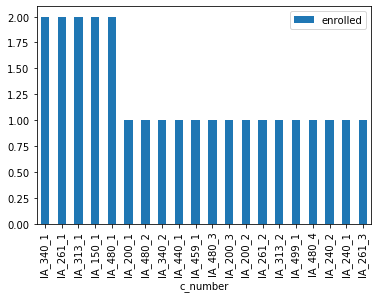

In [13]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y = 'enrolled', x = 'c_number')

## Question 4

In [14]:
sql_q4 = """
        select gp6.professor.p_name,
        count(gp6.course.c_name) as teaching_number
        from gp6.professor
        inner join gp6.course
        on gp6.professor.p_email = gp6.course.p_email
        group by professor.p_name
        order by teaching_number desc
"""

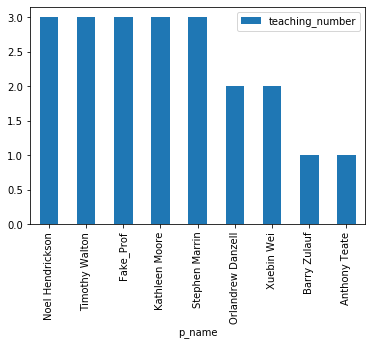

In [18]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y = 'teaching_number', x = 'p_name')

## Question 5

In [64]:
sql_q5_professor = """
        insert into gp6.professor(p_email, p_name, office)
        values('{}', '{}', '{}')
""".format('new_p@jmu.edu', 'new_p', 'new_office')

In [65]:
curr.execute(sql_q5_professor)

In [66]:
conn.commit()

In [67]:
df = pandas.read_sql_query('select * from gp6.professor',conn)
df [:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,ISAT 317
1,kolvoora@jmu.edu,Bob Kolvoord,ISAT 370
2,marrinsp@jmu.edu,Stephen Marrin,ENGEO 2104
3,mcgrawdk@jmu.edu,David McGraw,ISAT 352
4,moore8ka@jmu.edu,Kathleen Moore,ISAT 116
5,robinsks@jmu.edu,Kimberly Robinson,ENGEO 2125
6,tangjd@jmu.edu,Jeffrey Tang,ISAT 368
7,teateaa@jmu.edu,Anthony Teate,ISAT 126
8,thoma7lm@jmu.edu,Linda Thomas,ISAT 321
9,waltontr@jmu.edu,Timothy Walton,ISAT 326


In [68]:
sql_q5_course = """
        insert into gp6.course(c_num, c_name, room_num, p_email)
        values('{}', '{}', '{}', '{}')
""".format('ia_new', 'new_c_name', 'online', 'new_p@jmu.edu')


In [69]:
curr.execute(sql_q5_course)

In [70]:
conn.commit()

In [71]:
df = pandas.read_sql_query('select * from gp6.course',conn)
df [:]


,c_num,c_name,room_num,p_email
0,IA_150_1,intro_to_intel,ENGEO 2301,hendrinx@jmu.edu
1,IA_200_1,intro_to_nat_sec,FEST 1022,danzelox@jmu.edu
2,IA_200_2,intro_to_nat_sec,FEST 1022,danzelox@jmu.edu
3,IA_200_3,intro_to_nat_sec,ENGEO 1204,zulaufba@jmu.edu
4,IA_240_1,tech_applications,online,moore8ka@jmu.edu
5,IA_240_2,tech_applications,online,moore8ka@jmu.edu
6,IA_261_1,hypothesis_testing,ISAT 0148,waltontr@jmu.edu
7,IA_261_2,hypothesis_testing,ISAT 0348,waltontr@jmu.edu
8,IA_261_3,hypothesis_testing,ENGEO 2210,waltontr@jmu.edu
9,IA_313_1,counterfactual,ISAT 0148,hendrinx@jmu.edu


## Question 6

In [93]:
sql_q6_course = """
        update gp6.course
        set p_email = '{}'
        where p_email = '{}'
""".format('new_p@jmu.edu', 'weixx@jmu.edu')

In [94]:
curr.execute(sql_q6_course)

In [95]:
conn.commit()

In [96]:
df = pandas.read_sql_query('select * from gp6.course',conn)
df [:]

,c_num,c_name,room_num,p_email
0,IA_150_1,intro_to_intel,ENGEO 2301,hendrinx@jmu.edu
1,IA_200_1,intro_to_nat_sec,FEST 1022,danzelox@jmu.edu
2,IA_200_2,intro_to_nat_sec,FEST 1022,danzelox@jmu.edu
3,IA_200_3,intro_to_nat_sec,ENGEO 1204,zulaufba@jmu.edu
4,IA_240_1,tech_applications,online,moore8ka@jmu.edu
5,IA_240_2,tech_applications,online,moore8ka@jmu.edu
6,IA_261_1,hypothesis_testing,ISAT 0148,waltontr@jmu.edu
7,IA_261_2,hypothesis_testing,ISAT 0348,waltontr@jmu.edu
8,IA_261_3,hypothesis_testing,ENGEO 2210,waltontr@jmu.edu
9,IA_313_1,counterfactual,ISAT 0148,hendrinx@jmu.edu


In [108]:
sql_q6_professor = """
        delete from gp6.professor
        where p_email = '{}'
""".format('weixx@jmu.edu')

In [109]:
curr.execute(sql_q6_professor)

In [110]:
#curr.execute('ROLLBACK')

In [111]:
conn.commit()

In [112]:
df = pandas.read_sql_query('select * from gp6.professor',conn)
df [:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,ISAT 317
1,kolvoora@jmu.edu,Bob Kolvoord,ISAT 370
2,marrinsp@jmu.edu,Stephen Marrin,ENGEO 2104
3,mcgrawdk@jmu.edu,David McGraw,ISAT 352
4,moore8ka@jmu.edu,Kathleen Moore,ISAT 116
5,robinsks@jmu.edu,Kimberly Robinson,ENGEO 2125
6,tangjd@jmu.edu,Jeffrey Tang,ISAT 368
7,teateaa@jmu.edu,Anthony Teate,ISAT 126
8,thoma7lm@jmu.edu,Linda Thomas,ISAT 321
9,waltontr@jmu.edu,Timothy Walton,ISAT 326


## Close Connections

In [113]:
curr.close()

In [114]:
conn.close()